In [162]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
# 1. Clean the dataset
df_raw = pd.read_csv('./data/ikea_kommun_data.txt', sep='\t') # Replace with your actual file path
df = df_raw.select_dtypes(exclude=['object']) # Exclude categorical/textual data
df = df.drop(["Kommun_code", "Year", "Infrast", "Border"], axis=1) # Exclude categorical data

In [164]:
# 2. Perform PCA for dimensionality reduction
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

pca = PCA(n_components=0.95)
pca_df = pca.fit_transform(scaled_df)

print(df.shape)
print(df.dtypes)
print(pca_df.shape)

(207, 7)
Revenue                    int64
Employee                   int64
Population                 int64
Population_University      int64
Percent_University       float64
Productivity             float64
SalesIndex               float64
dtype: object
(207, 3)


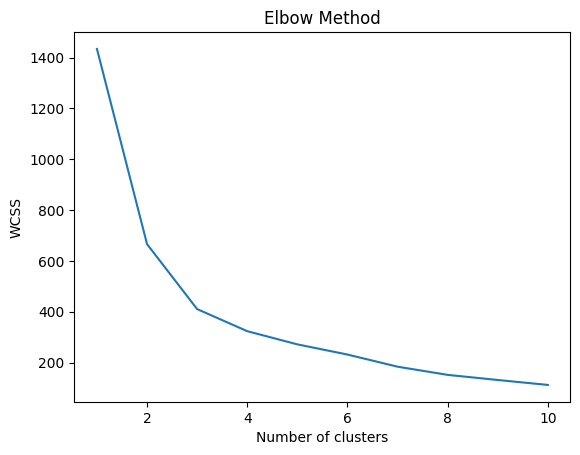

In [165]:
# 3. Apply the Elbow method to select an optimum number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [166]:
# 4. Apply k-means
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
clusters = kmeans.fit_predict(pca_df)

# Print the cluster labels
print(clusters)

[0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 2 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [167]:
# 5. Append cluster labels column to the original df
df = df_raw
df['Cluster'] = clusters

In [168]:
# Define a list of municipalities with IKEA stores
ikea_municipalities = ['Borlänge', 'Gävle', 'Göteborg', 'Haparanda', 'Helsingborg', 
                      'Jönköping', 'Kalmar', 'Karlstad', 'Linköping', 'Malmö', 
                      'Stockholm', 'Sundsvall', 'Uddevalla', 'Umeå', 'Uppsala', 
                      'Västerås', 'Älmhult', 'Örebro']

# Create a new column 'has_ikea' based on the 'Kommun_name' column
df['has_ikea'] = df['Kommun_name'].apply(lambda x: 1 if x in ikea_municipalities else 0)

# Print the resulting DataFrame
df

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Cluster,has_ikea
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1,1
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,1,1
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0,0,0
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0,0,0
204,1880,2010,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0,1,1
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0,0,0


<AxesSubplot: xlabel='Population', ylabel='Revenue'>

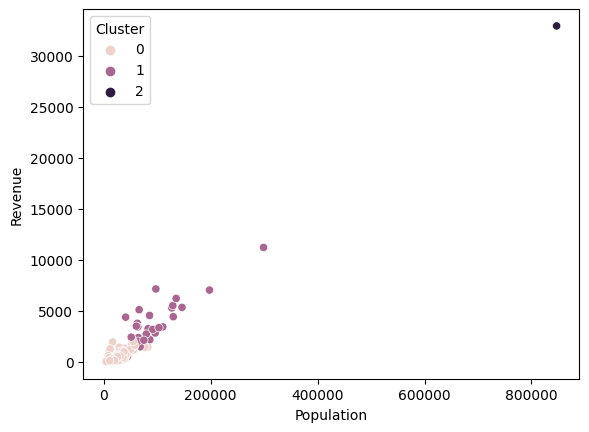

In [169]:
# 7. Explore the clusters
# Create a scatter plot of Revenue vs Population, colored by cluster
sns.scatterplot(data=df, x='Population', y='Revenue', hue='Cluster')

<AxesSubplot: xlabel='Cluster', ylabel='Revenue'>

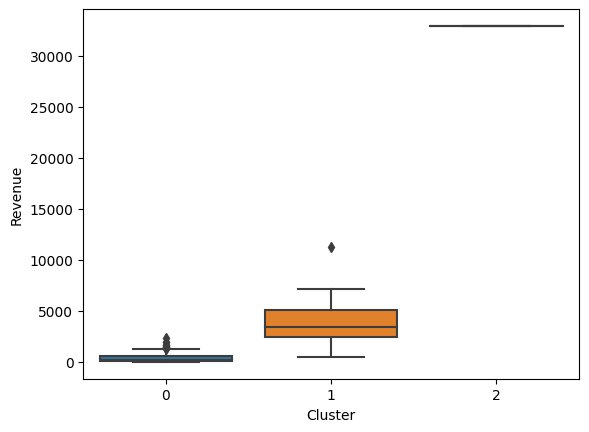

In [170]:
sns.boxplot(data=df, x='Cluster', y='Revenue')

<AxesSubplot: xlabel='Cluster', ylabel='Population'>

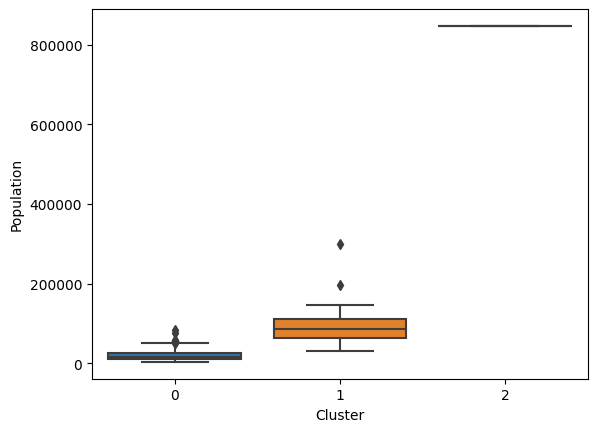

In [171]:
sns.boxplot(data=df, x='Cluster', y='Population')

In [172]:
# 8. Analyse the results
# Filter out municipalities where IKEA already exists or is close to existing IKEA
df = df[df['has_ikea'] == 0]

# Calculate summary statistics for each cluster
cluster_stats = df.groupby('Cluster').agg({'Population': ['mean', 'median', 'std'],
                                           'SalesIndex': ['mean', 'median', 'std'],
                                           'Revenue': ['mean', 'median', 'std']})
print(cluster_stats)

           Population                         SalesIndex              \
                 mean   median           std        mean      median   
Cluster                                                                
0        19788.896552  14788.5  13928.661723   37.725803   20.401673   
1        76136.142857  75025.0  24492.028034  312.717705  319.832286   

                         Revenue                       
                std         mean  median          std  
Cluster                                                
0         42.426573   366.132184   198.0   411.753560  
1        153.423326  3034.952381  3104.0  1488.986651  


<AxesSubplot: xlabel='Cluster', ylabel='Population'>

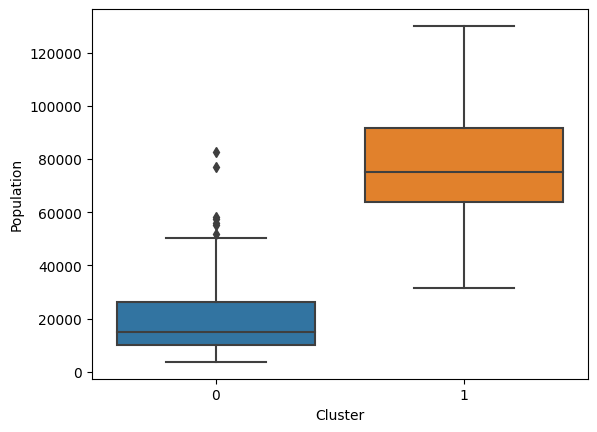

In [173]:
sns.boxplot(data=df, x='Cluster', y='Population')

<AxesSubplot: xlabel='Cluster', ylabel='SalesIndex'>

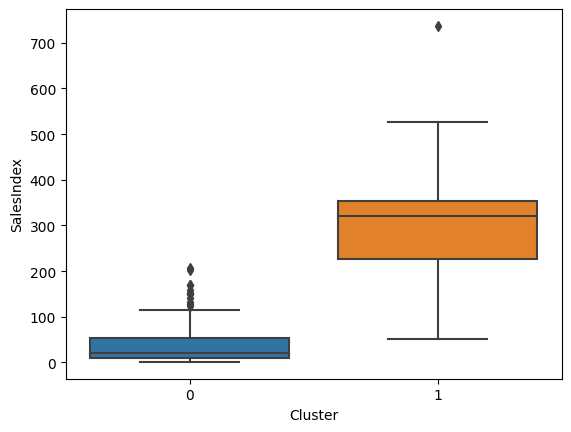

In [174]:
sns.boxplot(data=df, x='Cluster', y='SalesIndex')

<AxesSubplot: xlabel='Cluster', ylabel='Revenue'>

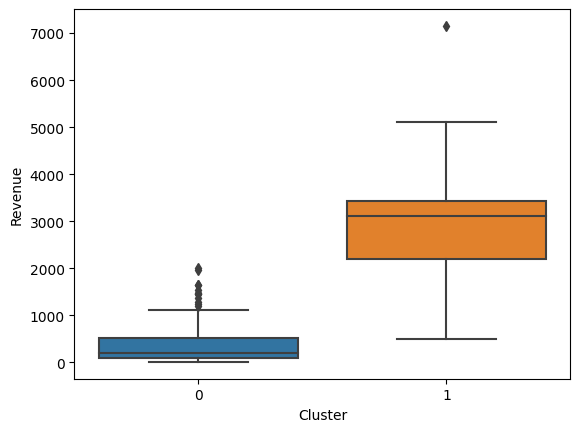

In [175]:
sns.boxplot(data=df, x='Cluster', y='Revenue')

In [178]:
# Identify top candidates for new IKEA stores within each cluster
top_candidates = df.groupby('Cluster').apply(lambda x: x.nlargest(5, ['Population', 'Revenue']))
top_candidates

Kommun_code  Year Kommun_name  Revenue  Employee  Population  \
Cluster                                                                     
0       10           127  2010    Botkyrka     1469       530       82608   
        12           136  2010     Haninge     1459      1031       77054   
        133         1383  2010     Varberg     1639      1109       58084   
        90           980  2010     Gotland     1542       767       57269   
        26           188  2010   Norrtälje     1191       678       56080   
1       53           581  2010  Norrköping     4438      2630      130050   
        118         1281  2010        Lund     3438      1561      110488   
        173         1490  2010       Borås     3365      1486      103294   
        9            126  2010    Huddinge     7153      2374       97453   
        42           484  2010  Eskilstuna     2844      1485       96311   

             Population_University  Percent_University  Productivity  \
Cluster                                                                
0       10                    8023            0.097121     138.90558   
        12                    6776            0.087938      70.92027   
        133                   6151            0.105898      74.06639   
        90                    6203            0.108313     100.75411   
        26                    4663            0.083149      88.03509   
1       53                   14526            0.111696      84.56785   
        118                  29233            0.264581     110.37653   
        173                  10919            0.105708     113.48541   
        9                    12795            0.131294     151.00150   
        42                    9898            0.102771      95.97915   

             SalesIndex  Infrast  Border  Cluster  has_ikea      Score  
Cluster                                                                 
0       10   151.363926        0       0        0         0  56.234173  
        12   150.333539        0       0        0         0  52.812886  
        133  168.880514        0       0        0         0  35.438682  
        90   158.885755        1       0        0         0  37.139429  
        26   122.719153        0       0        0         0  47.086482  
1       53   457.285981        0       0        1         0  29.303740  
        118  354.247229        0       0        1         0  32.137289  
        173  346.725400        0       0        1         0  30.696582  
        9    737.036192        0       0        1         0  13.624074  
        42   293.042210        0       0        1         0  33.864627

In [180]:
# Create a new column with a combined score
df['Score'] = df['Revenue'] / df['Population']

# Sort the dataframe by the score in descending order
df_sorted = df.sort_values('Score', ascending=False)

# Select the top 3 municipalities as the best candidates
top_candidates = df_sorted.head(10)
top_candidates

C:\Users\tveldhuis\AppData\Local\Temp\ipykernel_26872\2943049534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score'] = df['Revenue'] / df['Population']


,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Cluster,has_ikea,Score
98,1231,2010,Burlöv,1962,928,16701,1639,0.098138,105.95581,202.162031,0,0,0,0,0.117478
169,1486,2010,Strömstad,1281,667,11808,1071,0.090701,96.24918,131.992641,0,1,0,0,0.108486
132,1382,2010,Falkenberg,4395,2035,41008,3396,0.082813,108.23513,452.855314,0,0,1,0,0.107174
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0,1,0,0.077313
184,1730,2010,Eda,626,271,8524,426,0.049977,115.76541,64.502259,0,1,0,0,0.073440
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,1,0,0.073399
115,1277,2010,Åstorp,876,326,14737,828,0.056185,134.66672,90.261947,0,0,0,0,0.059442
165,1481,2010,Mölndal,3512,1487,60973,9962,0.163384,118.36336,361.872096,0,0,1,0,0.057599
16,160,2010,Täby,3441,1546,63789,13442,0.210726,111.54470,354.556345,0,0,1,0,0.053943
103,1261,2010,Kävlinge,1455,559,29013,3911,0.134802,130.44425,149.921384,0,0,0,0,0.050150
